# ***Permafrost Prediction Model***
# ***Problem Statement:-***
Permafrost thawing releases significant amounts of greenhouse gases, accelerating climate change. Using environmental and soil parameters such as soil temperature, active layer thickness, soil moisture, vegetation type, and ground ice content, the objective is to develop a machine learning model that can accurately predict daily permafrost carbon emissions (CO₂e g/m²/day) across different regions. This predictive capability will support climate scientists and policymakers in assessing risks and planning mitigation strategies.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
df = pd.read_csv("/content/permafrost_carbon_emissions_clean_10k (2).csv")
df.head()

,latitude_degN,longitude_degE,region,soil_temp_C,active_layer_thickness_cm,soil_moisture_pct,ground_ice_content_pct,vegetation_type,organic_carbon_stock_kg_m2,thaw_degree_days,elevation_m,emission_CO2e_g_m2_day
0,70.1247,-107.6222,Siberia,-8.81,72.1,71.2,16.5,Shrub Tundra,41.54,0,1353.9,30.16
1,74.1505,5.7285,Canada,-13.36,36.2,74.0,64.7,Moss Tundra,16.46,0,271.1,1.84
2,53.5562,-12.0569,Alaska,-8.49,72.9,28.7,9.4,Shrub Tundra,30.27,108,990.9,22.95
3,72.2283,-30.2067,Scandinavia,-9.90,59.7,45.1,51.5,Wetland,22.47,56,754.4,8.82
4,59.7042,93.4414,Scandinavia,-1.75,110.2,70.6,10.7,Wetland,37.81,426,20.9,54.07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude_degN               10000 non-null  float64
 1   longitude_degE              10000 non-null  float64
 2   region                      10000 non-null  object 
 3   soil_temp_C                 10000 non-null  float64
 4   active_layer_thickness_cm   10000 non-null  float64
 5   soil_moisture_pct           10000 non-null  float64
 6   ground_ice_content_pct      10000 non-null  float64
 7   vegetation_type             10000 non-null  object 
 8   organic_carbon_stock_kg_m2  10000 non-null  float64
 9   thaw_degree_days            10000 non-null  int64  
 10  elevation_m                 10000 non-null  float64
 11  emission_CO2e_g_m2_day      10000 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 937.6+ KB


In [10]:
df.describe()

,latitude_degN,longitude_degE,soil_temp_C,active_layer_thickness_cm,soil_moisture_pct,ground_ice_content_pct,organic_carbon_stock_kg_m2,thaw_degree_days,elevation_m,emission_CO2e_g_m2_day
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,62.370432,1.701235,-6.529489,80.830120,50.105230,42.504060,27.217299,276.275500,750.581030,27.163905
std,7.209543,97.928143,5.887473,35.721446,23.348023,21.712326,13.089809,277.054076,432.570591,18.451152
min,50.000300,-169.914200,-17.980000,10.000000,5.000000,0.500000,1.530000,0.000000,0.000000,0.000000
25%,56.158225,-82.801000,-11.630000,50.500000,29.900000,24.000000,16.080000,0.000000,381.300000,12.500000
50%,62.315550,2.474750,-6.540000,80.700000,50.400000,42.300000,27.040000,205.500000,752.600000,26.085000
75%,68.573950,86.123325,-1.460000,111.100000,70.300000,61.100000,38.240000,511.000000,1124.400000,39.920000
max,74.992900,169.974400,4.970000,156.400000,96.400000,84.800000,53.500000,968.000000,1499.900000,89.220000


In [11]:
df.isnull().sum()

,0
latitude_degN,0
longitude_degE,0
region,0
soil_temp_C,0
active_layer_thickness_cm,0
soil_moisture_pct,0
ground_ice_content_pct,0
vegetation_type,0
organic_carbon_stock_kg_m2,0
thaw_degree_days,0


In [13]:
df["vegetation_type"].unique()

array(['Shrub Tundra', 'Moss Tundra', 'Wetland', 'Boreal Forest',
       'Grass Tundra'], dtype=object)

In [14]:
df["region"].unique()

array(['Siberia', 'Canada', 'Alaska', 'Scandinavia', 'Tibetan Plateau'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in ["vegetation_type","region"]:
  df[i] = label_encoder.fit_transform(df[i])


In [17]:
label_encoder

LabelEncoder()

In [18]:
# Step 3: Split(Seprate x and y)features and target variable
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:11]
y = df["emission_CO2e_g_m2_day"]

In [19]:
x

,latitude_degN,longitude_degE,region,soil_temp_C,active_layer_thickness_cm,soil_moisture_pct,ground_ice_content_pct,vegetation_type,organic_carbon_stock_kg_m2,thaw_degree_days,elevation_m
0,70.1247,-107.6222,3,-8.81,72.1,71.2,16.5,3,41.54,0,1353.9
1,74.1505,5.7285,1,-13.36,36.2,74.0,64.7,2,16.46,0,271.1
2,53.5562,-12.0569,0,-8.49,72.9,28.7,9.4,3,30.27,108,990.9
3,72.2283,-30.2067,2,-9.90,59.7,45.1,51.5,4,22.47,56,754.4
4,59.7042,93.4414,2,-1.75,110.2,70.6,10.7,4,37.81,426,20.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,52.9615,-166.6409,0,3.51,131.8,51.2,37.6,3,31.53,737,442.8
9996,72.8822,-28.1039,3,-13.39,32.6,43.5,27.7,0,15.29,0,122.5
9997,62.3865,-37.3052,4,-11.49,49.2,65.9,42.9,1,18.62,0,1486.0
9998,59.3401,-64.4878,3,-10.13,68.9,83.4,7.8,2,38.69,34,116.6


In [20]:
y

,emission_CO2e_g_m2_day
0,30.16
1,1.84
2,22.95
3,8.82
4,54.07
...,...
9995,54.01
9996,0.00
9997,2.09
9998,23.98


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Normalize the data to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [23]:
xtrain

array([[-0.16197139, -0.38870244, -1.39439212, ..., -0.55209706,
        -0.99052535, -1.58873205],
       [-0.21743467,  0.14536336, -0.62718875, ...,  1.43168835,
        -0.43384431, -1.17728979],
       [ 0.57349648, -0.78591175, -0.62718875, ..., -0.77650372,
         1.98807969, -1.40913057],
       ...,
       [ 0.29477855,  1.03217383,  0.90721798, ..., -0.1185495 ,
         1.43501347,  0.61363982],
       [-1.23912751,  0.59468918,  0.90721798, ...,  0.27378051,
        -0.73025889, -0.37844457],
       [-0.57780033,  0.95755704,  0.90721798, ..., -1.51383989,
         0.63614003,  1.6813094 ]])

In [40]:
# Make predictions using the trained Random Forest model
ypred = rf_model.predict(xtest)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)

# Make predictions
rf_ypred = rf_model.predict(xtest)

# Evaluate the model
rf_mae = mean_absolute_error(ytest, rf_ypred)
rf_mse = mean_squared_error(ytest, rf_ypred)
rf_r2 = r2_score(ytest, rf_ypred)

print("Random Forest Regressor Performance:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2):", rf_r2)

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 4.179286100000001
Mean Squared Error (MSE): 28.39637127349
R-squared (R2): 0.9194605001658839


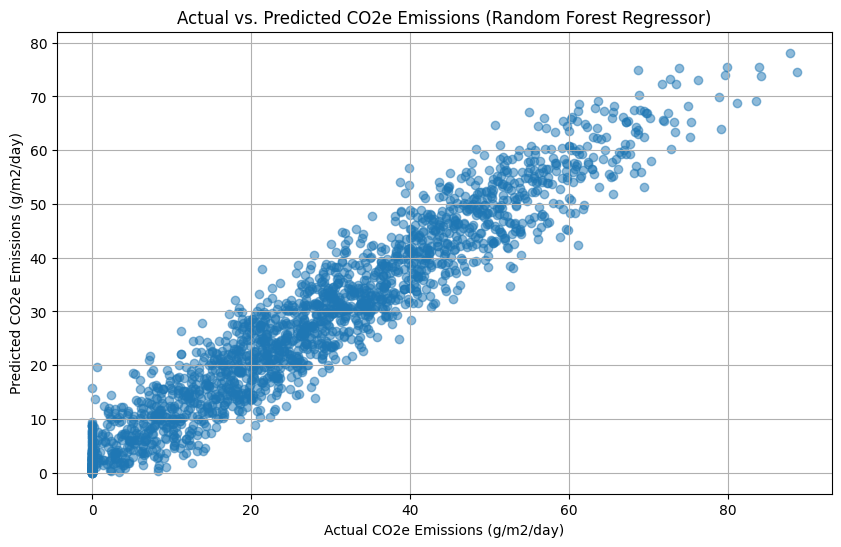

In [42]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, rf_ypred, alpha=0.5)
plt.xlabel("Actual CO2e Emissions (g/m2/day)")
plt.ylabel("Predicted CO2e Emissions (g/m2/day)")
plt.title("Actual vs. Predicted CO2e Emissions (Random Forest Regressor)")
plt.grid(True)
plt.show()

Feature Importances (Random Forest Regressor):
                       feature  importance
8   organic_carbon_stock_kg_m2    0.402770
3                  soil_temp_C    0.235665
9             thaw_degree_days    0.178954
4    active_layer_thickness_cm    0.103211
6       ground_ice_content_pct    0.020514
5            soil_moisture_pct    0.013571
10                 elevation_m    0.013114
7              vegetation_type    0.011781
1               longitude_degE    0.008119
0                latitude_degN    0.007913
2                       region    0.004388


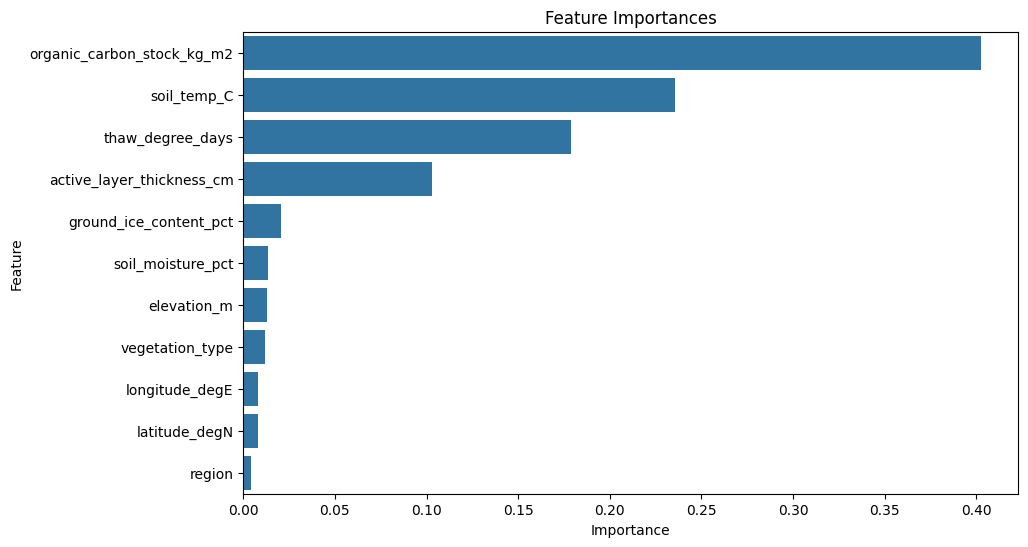

In [44]:
# Analyze feature importances
feature_importances = rf_model.feature_importances_

# Get the feature names
feature_names = x.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Print feature importances
print("Feature Importances (Random Forest Regressor):")
print(importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [46]:

print("Random Forest Regressor Predictions:")
print(rf_ypred)

Random Forest Regressor Predictions:
[32.191   5.1734 65.2041 ...  0.2624 12.4584 62.134 ]


In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(xtrain, ytrain)


RandomForestRegressor()